In [91]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

import matplotlib.pyplot as plt

# If there is no intervention, at what point in time will the moose population in Northeastern Minnesota become extinct?

The following data was collected from the Minnesota DNR.

In [92]:
population = [8160, 8840, 6860, 7890, 7840, 5700, 4900, 4230, 2760, 4350, 3450, 4020, 3710, 3030];

In [93]:
years = range(2005,2019)

range(2005, 2019)

In [94]:
population_series = TimeSeries(population, index = years, dtype = float)

,values
2005,8160.0
2006,8840.0
2007,6860.0
2008,7890.0
2009,7840.0
2010,5700.0
2011,4900.0
2012,4230.0
2013,2760.0
2014,4350.0


In [95]:
def f(years):
    t = TimeSeries()
    for x in (0, 2050):
#   for x in years:
        y = (-454.286*x) + 919206
        t[x] = y
    return t

(2005, 2025)

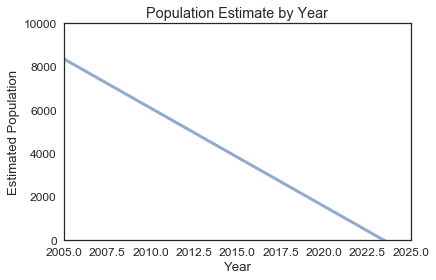

In [96]:
plot(f(years))
decorate(xlabel = 'Year',
           ylabel = 'Estimated Population',
           title = 'Population Estimate by Year')
plt.ylim([0, 10000])
plt.xlim([2005, 2025])

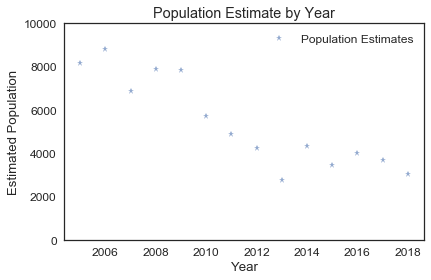

In [97]:
def population_graph(series):
    plot(series, '*', label='Population Estimates')
    decorate(xlabel = 'Year',
           ylabel = 'Estimated Population',
           title = 'Population Estimate by Year')
    plt.ylim([0, 10000])
    
population_graph(population_series)

In [98]:
difference = compute_rel_diff(population_series)
change = rel_diffs.dropna()

NameError: name 'rel_diffs' is not defined

In [99]:
np.random.choice(change)

NameError: name 'change' is not defined

In [100]:
time_initial = 2018
moose = population_series[time_initial]
duration=10

10

In [101]:
system = System(time_initial=time_initial,
               moose=moose,
               duration=duration,
               change=change)

#change duration to run until population = 0

NameError: name 'change' is not defined

In [102]:
#Write update function
def update_function(system, change, i, current_population):
    np.random.choice(change)
    new_population = current_population * change
    return new_population

In [103]:
def simulation(system, update_function):
    initial = system.time_initial
    end = inital + system.duration
    
    results = TimeSeries()
    results[initial] = system.moose
    
    for i in linrange(initial, end):
        results[i+1] = update_function(results[i], i, system)
        
    return results 

In [104]:
plot(results)

NameError: name 'results' is not defined

In [105]:
#plot predition and initial data

In [106]:
#def plot_all_sim(system, update_function, iterations):
   # for i in range(iterations):
        #results = simulation(system, update_function)
        #plot(results, )
